<a href="https://colab.research.google.com/github/kavnthir/ECE4994/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install --quiet norse

In [12]:
import torch
import norse
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def plot_activity_2d(fig, z : torch.Tensor):
    channels = z.shape[2]
    B = z.shape[1]
    T = z.shape[0]
    for c in range(channels):
        ax = fig.add_subplot(1, channels, c+1)
        s = ((z[:,:,c].sum(axis=0)/T).sum(axis=0)/B)
        ax.matshow(s)

def plot_spikes_2d(fig, z):
    T = z.shape[0]
    C = z.shape[1]

    for c in range(C):
        ax = fig.add_subplot(1, C, c+1, projection='3d')
        s = z[:,c].detach().to_sparse().coalesce()

        ax.invert_yaxis()
        ax.invert_zaxis()
        ax.set_xlim([0,T])
        ax.set_xlabel('time [ms]')
        ax.scatter(s.indices()[0], s.indices()[2], s.indices()[1], s=1.0, c=s.values())

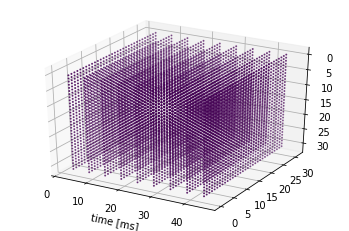

In [14]:
T = 48
v_th = .5

z = norse.torch.functional.encode.constant_current_lif_encode(
    1.4 * torch.ones(1, 32, 32), 
    p=norse.torch.functional.lif.LIFParameters(v_th=torch.as_tensor(v_th)),
    seq_length=T
)
fig = plt.figure()
plot_spikes_2d(fig, z)

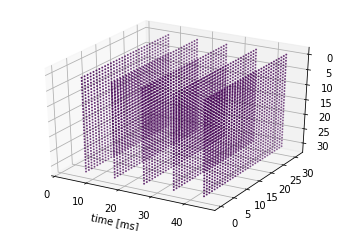

In [15]:
T = 48
v_th = .8

z = norse.torch.functional.encode.constant_current_lif_encode(
    1.4 * torch.ones(1, 32, 32), 
    p=norse.torch.functional.lif.LIFParameters(v_th=torch.as_tensor(v_th)),
    seq_length=T
)
fig = plt.figure()
plot_spikes_2d(fig, z)

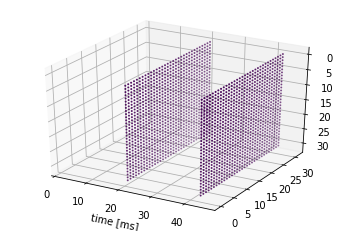

In [16]:
T = 48
v_th = 1.25

z = norse.torch.functional.encode.constant_current_lif_encode(
    1.4 * torch.ones(1, 32, 32), 
    p=norse.torch.functional.lif.LIFParameters(v_th=torch.as_tensor(v_th)),
    seq_length=T
)
fig = plt.figure()
plot_spikes_2d(fig, z)

In [17]:
import torchvision

batch_size = 32

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

train_data = torchvision.datasets.MNIST(
    root=".",
    train=True,
    download=True,
    transform=transform,
)

train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



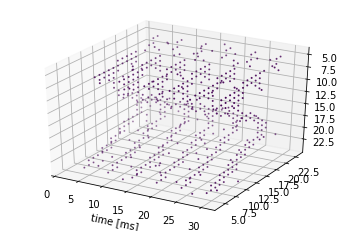

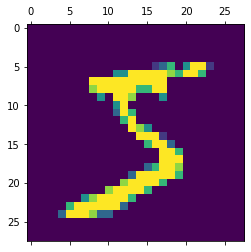

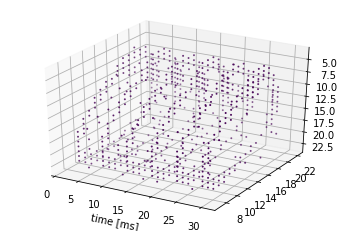

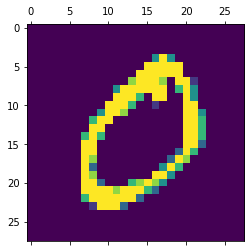

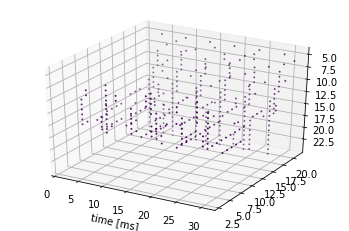

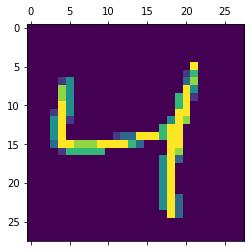

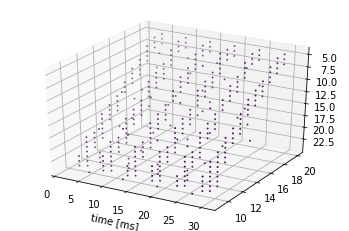

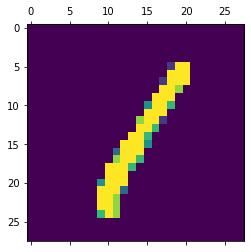

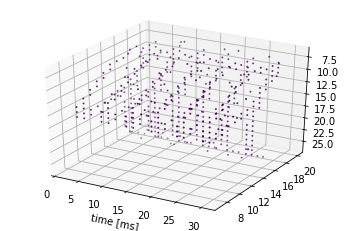

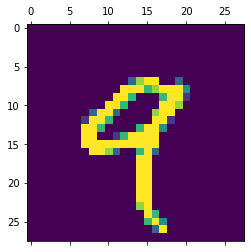

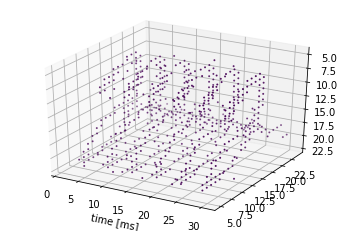

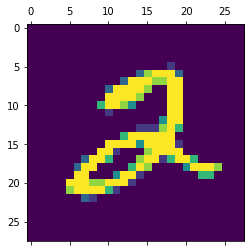

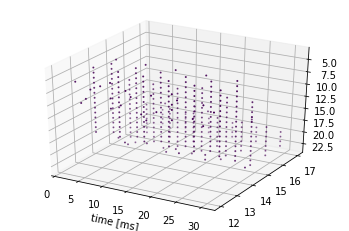

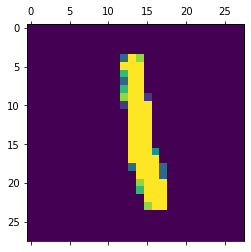

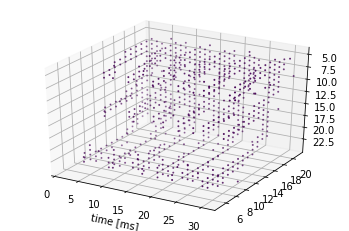

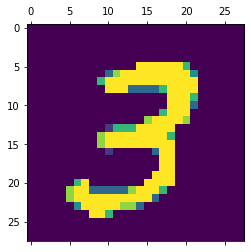

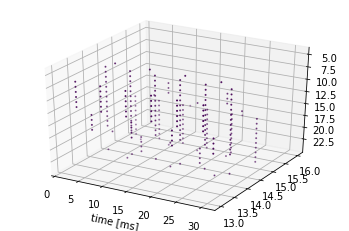

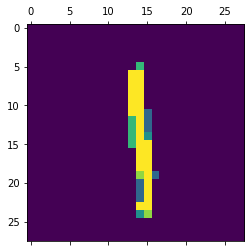

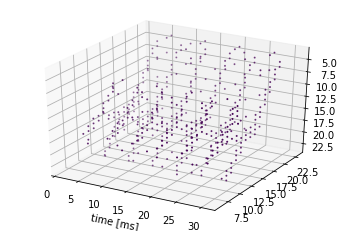

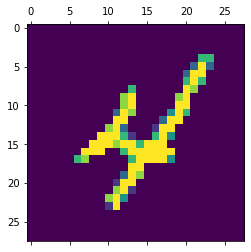

In [18]:
for i in range(10):
  img, label = train_data[i]
  
  T = 32
  z = norse.torch.functional.encode.constant_current_lif_encode(img, seq_length=T)
  
  fig = plt.figure()
  plot_spikes_2d(fig, z)
  fig = plt.figure()
  plot_activity_2d(fig, z.unsqueeze(1))